# Пример создания сверточных и пуллинг слоев

In [40]:
import numpy as np

import os
import matplotlib.pyplot as plt
import tensorflow as tf
# from tensorflow import keras
from keras import layers, utils, optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras import Sequential
from keras.datasets import cifar10, mnist, cifar100


# from tensorflow. imagenet



tf.config.list_physical_devices('GPU')

[]

In [41]:
# установка параметров нейросети
batch_size = 128
num_classes = 10
epochs = 5
data_augmentation = True
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [42]:
# разделение тренировочной и тестовой выборки
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


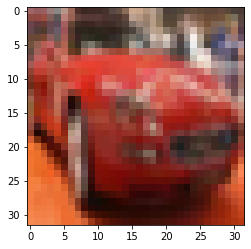

In [55]:
plt.imshow(x_train[5])

In [44]:
# конфигурирование слоев нейросети
model = Sequential([

    # слои нейросети ответственные за свертку и max-pooling
    layers.Conv2D(8, (4, 4), padding='valid', input_shape=x_train.shape[1:]),
    layers.Activation('relu'),
    layers.Conv2D(8, (4, 4)),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.15),

    layers.Conv2D(64, (3, 3), padding='valid'),
    layers.Activation('relu'),
    layers.Conv2D(64, (3, 3)),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.2),

    # полносвязные слои нейронной сети
    layers.Flatten(),
    layers.Dense(1024),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes),
    layers.Activation('softmax')
])

In [46]:
# инициализация RMSprop optimizer
opt = optimizers.RMSprop(learning_rate=0.0005, decay=1e-6)

# компиляция модели
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [47]:
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=0.5)

# запуск data augmentation через fit_generator
model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
          epochs=epochs,
          validation_data=(x_test, y_test),
          workers=8)

Epoch 1/5
391/391 [==============================] - 56s 139ms/step - loss: 1.9044 - accuracy: 0.3067 - val_loss: 1.6747 - val_accuracy: 0.3961
Epoch 2/5
391/391 [==============================] - 54s 137ms/step - loss: 1.6597 - accuracy: 0.3965 - val_loss: 1.4692 - val_accuracy: 0.4642
Epoch 3/5
391/391 [==============================] - 54s 137ms/step - loss: 1.5544 - accuracy: 0.4392 - val_loss: 1.4195 - val_accuracy: 0.4933
Epoch 4/5
391/391 [==============================] - 53s 135ms/step - loss: 1.4760 - accuracy: 0.4695 - val_loss: 1.3018 - val_accuracy: 0.5303
Epoch 5/5
391/391 [==============================] - 53s 135ms/step - loss: 1.4183 - accuracy: 0.4933 - val_loss: 1.3046 - val_accuracy: 0.5283


In [48]:
# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 3s 10ms/step - loss: 1.3046 - accuracy: 0.5283
Test loss: 1.3045744895935059
Test accuracy: 0.5282999873161316


In [51]:
x_test[0]

array([[[0.61960787, 0.4392157 , 0.19215687],
        [0.62352943, 0.43529412, 0.18431373],
        [0.64705884, 0.45490196, 0.2       ],
        ...,
        [0.5372549 , 0.37254903, 0.14117648],
        [0.49411765, 0.35686275, 0.14117648],
        [0.45490196, 0.33333334, 0.12941177]],

       [[0.59607846, 0.4392157 , 0.2       ],
        [0.5921569 , 0.43137255, 0.15686275],
        [0.62352943, 0.44705883, 0.1764706 ],
        ...,
        [0.53333336, 0.37254903, 0.12156863],
        [0.49019608, 0.35686275, 0.1254902 ],
        [0.46666667, 0.34509805, 0.13333334]],

       [[0.5921569 , 0.43137255, 0.18431373],
        [0.5921569 , 0.42745098, 0.12941177],
        [0.61960787, 0.43529412, 0.14117648],
        ...,
        [0.54509807, 0.38431373, 0.13333334],
        [0.50980395, 0.37254903, 0.13333334],
        [0.47058824, 0.34901962, 0.12941177]],

       ...,

       [[0.26666668, 0.4862745 , 0.69411767],
        [0.16470589, 0.39215687, 0.5803922 ],
        [0.12156863, 0

In [52]:
y_test.shape

(10000, 10)

### Выводы
Попробуйте улучшить точность распознавания образов cifar 10 сверточной нейронной сетью, рассмотренной на уроке.
Приложите анализ с описанием того, что улучшает работу нейронной сети, а что ухудшает

Опишите в анализе, какие изменения необходимо было бы внести в получившуюся нейронную сеть, если бы ей нужно было работать не с cifar10, а с MNIST, CIFAR100 и IMAGENET

Положительный эффект на работу НС оказали следующие изменения:
- уменьшение количества фильтров в первом свёрточном слое
- увеличение размера ядра на первом свёрточном слое
- изменение типа отступа
- уменьшение процента зашумления
- количество нейронов выходного слоя
- подбор оптимального коэффициента обучения
Отрицательный эффект при следующих изменениях:
- увеличение количества фильтров свёрточном слое
- увеличение процента зашумления
- слишком большой размер окна полинга
- черезмерное увеличение/уменьшение коэффициента обучения

Думаю при работе с MNIST нужно было бы уменьшить размер ядра свертки, а при работе с CIFAR100 добавить еще несколько сверточных слоев, что бы НС научилась распознавать больше признаков и как следствие делить на большее количество классов.
